### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import numpy as np

# For tensor
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.compat.v1.set_random_seed(42)

In [3]:
tf.__version__

'2.0.0'

### Collect Data

In [4]:
from tensorflow import keras
#import keras

In [5]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [6]:
print(testY[0:5])
print(trainY[0:5])

[9 2 1 1 6]
[9 0 0 3 0]


In [7]:
trainX.shape
# testX.shape

(60000, 28, 28)

In [8]:
# Find distinct values in target
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [9]:
# For classification problems
    # Convert the target feature into one-hot vectors using tf.keras.utils.to_categorical()
    # Use categorical_crossentropy as the loss function while compiling the model

In [10]:
trainY = keras.utils.to_categorical(trainY, num_classes=10)
testY = keras.utils.to_categorical(testY, num_classes=10)

In [11]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

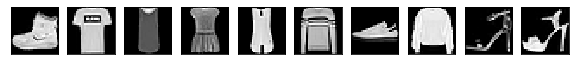

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [12]:
# Include below line to draw images here
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[10,1])
for i in range(10):
    fig.add_subplot(1, 10, i+1)     # Starts with 1 (not 0), therefore adding 1
    
    plt.imshow(trainX[i], cmap="gray")     # Works on index
    
    plt.xticks([])     # removes labels from x-axis
    plt.yticks([])     # removes labels from y-axis

plt.show()

print(trainY[100])
# plt.imshow(trainX[0], cmap="gray")

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [13]:
model = keras.models.Sequential()     # Initialize model
model.add(keras.layers.Reshape((784,), input_shape=(28,28,)))     # Reshape input 28*28 pixels data to 784 columns
#model.add(keras.layers.BatchNormalization())     # Normalize the data

In [14]:
# Add hidden layers
model.add(keras.layers.Dense(200, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))

# Add output layer
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
# Compile the model
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [17]:
a1 = np.array([1,2])
a2 = np.array([3,4])
a1*a2

array([3, 8])

### Execute the model using model.fit()

In [18]:
model.fit(trainX, trainY, batch_size=100, epochs=10, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 84us/sample - loss: 1.6691 - accuracy: 0.6090 - val_loss: 1.2703 - val_accuracy: 0.6899
Epoch 2/10
60000/60000 [==============================] - 3s 47us/sample - loss: 1.0640 - accuracy: 0.7211 - val_loss: 0.9274 - val_accuracy: 0.7235
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.8284 - accuracy: 0.7557 - val_loss: 0.7670 - val_accuracy: 0.7596
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.7099 - accuracy: 0.7804 - val_loss: 0.6842 - val_accuracy: 0.7770
Epoch 5/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6371 - accuracy: 0.7969 - val_loss: 0.6336 - val_accuracy: 0.7900
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5877 - accuracy: 0.8072 - val_loss: 0.5891 - val_accuracy: 0.8017
Epoch 7/10
60000/60000 [==============================] 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [19]:
model = keras.models.Sequential()     # Initialize model
model.add(keras.layers.Reshape((784,), input_shape=(28,28,)))     # Reshape input 28*28 pixels data to 784 columns
model.add(keras.layers.BatchNormalization())     # Normalize the data

model.add(keras.layers.Dense(200, activation="sigmoid"))     # Add hidden layers
model.add(keras.layers.Dense(100, activation="sigmoid"))     # Add hidden layers
model.add(keras.layers.Dense(10, activation="softmax"))     # Add output layer

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])     # Compile the model

### Execute the model

In [20]:
model.fit(trainX, trainY, batch_size=100, epochs=10, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 92us/sample - loss: 1.9002 - accuracy: 0.4890 - val_loss: 1.5275 - val_accuracy: 0.6166
Epoch 2/10
60000/60000 [==============================] - 4s 62us/sample - loss: 1.3013 - accuracy: 0.6604 - val_loss: 1.1193 - val_accuracy: 0.7119
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 1.0137 - accuracy: 0.7222 - val_loss: 0.9230 - val_accuracy: 0.7314
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.8646 - accuracy: 0.7386 - val_loss: 0.8133 - val_accuracy: 0.7421
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.7751 - accuracy: 0.7491 - val_loss: 0.7435 - val_accuracy: 0.7559
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.7158 - accuracy: 0.7584 - val_loss: 0.6953 - val_accuracy: 0.7605
Epoch 7/10
60000/60000 [==============================] 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [21]:
sgd = keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['accuracy'])     # Compile the model

In [22]:
model.fit(trainX, trainY, batch_size=100, epochs=10, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.5805 - accuracy: 0.7955 - val_loss: 0.5870 - val_accuracy: 0.7916
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5777 - accuracy: 0.7969 - val_loss: 0.5850 - val_accuracy: 0.7928
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5755 - accuracy: 0.7980 - val_loss: 0.5833 - val_accuracy: 0.7929
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5733 - accuracy: 0.7985 - val_loss: 0.5816 - val_accuracy: 0.7942
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5714 - accuracy: 0.7987 - val_loss: 0.5798 - val_accuracy: 0.7940
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.5700 - accuracy: 0.7990 - val_loss: 0.5781 - val_accuracy: 0.7948
Epoch 7/10
60000/60000 [==============================] 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [69]:
model = keras.models.Sequential()     # Initialize model
model.add(keras.layers.Reshape((784,), input_shape=(28,28,)))     # Reshape input 28*28 pixels data to 784 columns
model.add(keras.layers.BatchNormalization())     # Normalize the data

model.add(keras.layers.Dense(100, activation="sigmoid"))     # Add hidden layers
model.add(keras.layers.Dense(100, activation="sigmoid"))     # Add hidden layers
model.add(keras.layers.Dense(10, activation="softmax"))     # Add output layer

# sgd = keras.optimizers.SGD(lr=0.03)
sgd = keras.optimizers.SGD(learning_rate=0.03)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['accuracy'])     # Compile the model

## Review model

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [70]:
# Execute the model
model.fit(trainX, trainY, batch_size=100, epochs=100, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 11s 176us/sample - loss: 1.5741 - accuracy: 0.5995 - val_loss: 1.0699 - val_accuracy: 0.7295
Epoch 2/100
60000/60000 [==============================] - 7s 122us/sample - loss: 0.8717 - accuracy: 0.7423 - val_loss: 0.7406 - val_accuracy: 0.7586
Epoch 3/100
60000/60000 [==============================] - 7s 118us/sample - loss: 0.6726 - accuracy: 0.7728 - val_loss: 0.6277 - val_accuracy: 0.7810
Epoch 4/100
60000/60000 [==============================] - 8s 128us/sample - loss: 0.5887 - accuracy: 0.7946 - val_loss: 0.5684 - val_accuracy: 0.8002
Epoch 5/100
60000/60000 [==============================] - 7s 125us/sample - loss: 0.5372 - accuracy: 0.8108 - val_loss: 0.5310 - val_accuracy: 0.8114
Epoch 6/100
60000/60000 [==============================] - 8s 133us/sample - loss: 0.5031 - accuracy: 0.8218 - val_loss: 0.5046 - val_accuracy: 0.8223
Epoch 7/100
60000/60000 [==================

60000/60000 [==============================] - 9s 149us/sample - loss: 0.2763 - accuracy: 0.9005 - val_loss: 0.3424 - val_accuracy: 0.8773
Epoch 55/100
60000/60000 [==============================] - 9s 151us/sample - loss: 0.2743 - accuracy: 0.9015 - val_loss: 0.3406 - val_accuracy: 0.8758
Epoch 56/100
60000/60000 [==============================] - 9s 151us/sample - loss: 0.2719 - accuracy: 0.9025 - val_loss: 0.3407 - val_accuracy: 0.8776
Epoch 57/100
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2705 - accuracy: 0.9030 - val_loss: 0.3395 - val_accuracy: 0.8772
Epoch 58/100
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2685 - accuracy: 0.9043 - val_loss: 0.3397 - val_accuracy: 0.8751
Epoch 59/100
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2655 - accuracy: 0.9046 - val_loss: 0.3391 - val_accuracy: 0.8778
Epoch 60/100
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2638 - accuracy

## Extra: Not part of Lab

In [29]:
model = keras.models.Sequential()     # Initialize model
model.add(keras.layers.Reshape((784,), input_shape=(28,28,)))     # Reshape input 28*28 pixels data to 784 columns
model.add(keras.layers.BatchNormalization())     # Normalize the data

model.add(keras.layers.Dense(100, activation="sigmoid"))     # Add hidden layers
model.add(keras.layers.Dense(100, activation="sigmoid"))     # Add hidden layers
model.add(keras.layers.Dense(10, activation="softmax"))     # Add output layer

sgd = keras.optimizers.SGD(learning_rate=0.03)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['accuracy'])     # Compile the model

In [30]:
# Online or incremental learning (batch_size=1)
# Execute the model
model.fit(trainX, trainY, batch_size=1, epochs=2, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 216s 4ms/sample - loss: 2.3147 - accuracy: 0.0968 - val_loss: 2.3099 - val_accuracy: 0.0963
Epoch 2/2
60000/60000 [==============================] - 203s 3ms/sample - loss: 2.3094 - accuracy: 0.0986 - val_loss: 2.3142 - val_accuracy: 0.0969


### Check speed of execution with change in batch_size

In [31]:
# Execute with batch size 2
# Execute the model
model.fit(trainX, trainY, batch_size=2, epochs=2, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 110s 2ms/sample - loss: 1.3071 - accuracy: 0.5241 - val_loss: 0.6092 - val_accuracy: 0.7697
Epoch 2/2
60000/60000 [==============================] - 109s 2ms/sample - loss: 0.7914 - accuracy: 0.7127 - val_loss: 0.5475 - val_accuracy: 0.8048


In [42]:
# Execute the model
model.fit(trainX, trainY, batch_size=2, epochs=2, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 220s 4ms/sample - loss: 1.0280 - accuracy: 0.6429 - val_loss: 0.5421 - val_accuracy: 0.8041
Epoch 2/2
60000/60000 [==============================] - 219s 4ms/sample - loss: 0.7354 - accuracy: 0.7283 - val_loss: 0.5617 - val_accuracy: 0.7988


In [45]:
# Execute the model
model.fit(trainX, trainY, batch_size=3, epochs=2, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.9147 - accuracy: 0.6886 - val_loss: 0.5059 - val_accuracy: 0.8176
Epoch 2/2
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.6993 - accuracy: 0.7558 - val_loss: 0.4796 - val_accuracy: 0.8238


In [47]:
# Execute the model
model.fit(trainX, trainY, batch_size=4, epochs=2, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 55s 924us/sample - loss: 0.8303 - accuracy: 0.7099 - val_loss: 0.4811 - val_accuracy: 0.8271
Epoch 2/2
60000/60000 [==============================] - 54s 905us/sample - loss: 0.6379 - accuracy: 0.7760 - val_loss: 0.4501 - val_accuracy: 0.8326


In [49]:
# Execute the model
model.fit(trainX, trainY, batch_size=5, epochs=2, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 45s 753us/sample - loss: 0.7894 - accuracy: 0.7255 - val_loss: 0.4779 - val_accuracy: 0.8257
Epoch 2/2
60000/60000 [==============================] - 42s 699us/sample - loss: 0.5964 - accuracy: 0.7898 - val_loss: 0.4458 - val_accuracy: 0.8358


In [51]:
# Execute the model
model.fit(trainX, trainY, batch_size=6, epochs=2, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 36s 606us/sample - loss: 0.7712 - accuracy: 0.7313 - val_loss: 0.4634 - val_accuracy: 0.8301
Epoch 2/2
60000/60000 [==============================] - 39s 649us/sample - loss: 0.5637 - accuracy: 0.7998 - val_loss: 0.4392 - val_accuracy: 0.8376


In [53]:
# Execute the model
model.fit(trainX, trainY, batch_size=7, epochs=2, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 34s 567us/sample - loss: 0.7629 - accuracy: 0.7365 - val_loss: 0.4709 - val_accuracy: 0.8272
Epoch 2/2
60000/60000 [==============================] - 35s 587us/sample - loss: 0.5407 - accuracy: 0.8081 - val_loss: 0.4459 - val_accuracy: 0.8371


In [55]:
# Execute the model
model.fit(trainX, trainY, batch_size=8, epochs=2, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 28s 470us/sample - loss: 0.7651 - accuracy: 0.7372 - val_loss: 0.4722 - val_accuracy: 0.8281
Epoch 2/2
60000/60000 [==============================] - 30s 504us/sample - loss: 0.5304 - accuracy: 0.8105 - val_loss: 0.4386 - val_accuracy: 0.8366


In [57]:
# Execute the model
model.fit(trainX, trainY, batch_size=9, epochs=2, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 27s 457us/sample - loss: 0.7708 - accuracy: 0.7350 - val_loss: 0.4788 - val_accuracy: 0.8273
Epoch 2/2
60000/60000 [==============================] - 28s 474us/sample - loss: 0.5215 - accuracy: 0.8127 - val_loss: 0.4373 - val_accuracy: 0.8406


In [59]:
# Execute the model
model.fit(trainX, trainY, batch_size=10, epochs=2, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 26s 430us/sample - loss: 0.7752 - accuracy: 0.7361 - val_loss: 0.4826 - val_accuracy: 0.8257
Epoch 2/2
60000/60000 [==============================] - 27s 443us/sample - loss: 0.5176 - accuracy: 0.8149 - val_loss: 0.4449 - val_accuracy: 0.8357


In [61]:
# Execute the model
model.fit(trainX, trainY, batch_size=15, epochs=2, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 35s 577us/sample - loss: 0.8276 - accuracy: 0.7323 - val_loss: 0.5066 - val_accuracy: 0.8175
Epoch 2/2
60000/60000 [==============================] - 32s 537us/sample - loss: 0.5075 - accuracy: 0.8174 - val_loss: 0.4494 - val_accuracy: 0.8368


In [63]:
# Execute the model
model.fit(trainX, trainY, batch_size=20, epochs=2, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 28s 460us/sample - loss: 0.8969 - accuracy: 0.7171 - val_loss: 0.5486 - val_accuracy: 0.8048
Epoch 2/2
60000/60000 [==============================] - 25s 425us/sample - loss: 0.5265 - accuracy: 0.8127 - val_loss: 0.4729 - val_accuracy: 0.8276


In [67]:
# Execute the model
model.fit(trainX, trainY, batch_size=30, epochs=3, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 21s 349us/sample - loss: 1.0312 - accuracy: 0.6878 - val_loss: 0.6227 - val_accuracy: 0.7788
Epoch 2/3
60000/60000 [==============================] - 18s 301us/sample - loss: 0.5653 - accuracy: 0.7998 - val_loss: 0.5067 - val_accuracy: 0.8194
Epoch 3/3
60000/60000 [==============================] - 18s 301us/sample - loss: 0.4867 - accuracy: 0.8269 - val_loss: 0.4655 - val_accuracy: 0.8306
